In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu


/Users/bercaakbayir/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
RED_WINE_DATA = "./data/winequality-red.csv"
WHITE_WINE_DATA = "./data/winequality-white.csv"

In [3]:
wine_red = pd.read_csv(RED_WINE_DATA, sep=";")
wine_white = pd.read_csv(WHITE_WINE_DATA, sep=";")


In [4]:
red = wine_red.copy()
white = wine_white.copy()
red['wine_type'] = 'red'
white['wine_type'] = 'white'

# Combine the datasets
wines = pd.concat([red, white],axis=0, ignore_index=True)

In [5]:
wine_red.shape

(1599, 12)

In [6]:
wine_white.shape

(4898, 12)

In [7]:
wines.shape

(6497, 13)

In [8]:
wine_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
wine_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [10]:
wine_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
wine_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [12]:
wine_red.shape

(1599, 12)

In [13]:
wine_white.shape

(4898, 12)

In [14]:
round((wine_red.isnull().sum() / len(wine_red)) * 100, 2)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [15]:
round((wine_white.isnull().sum() / len(wine_red)) * 100, 2)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

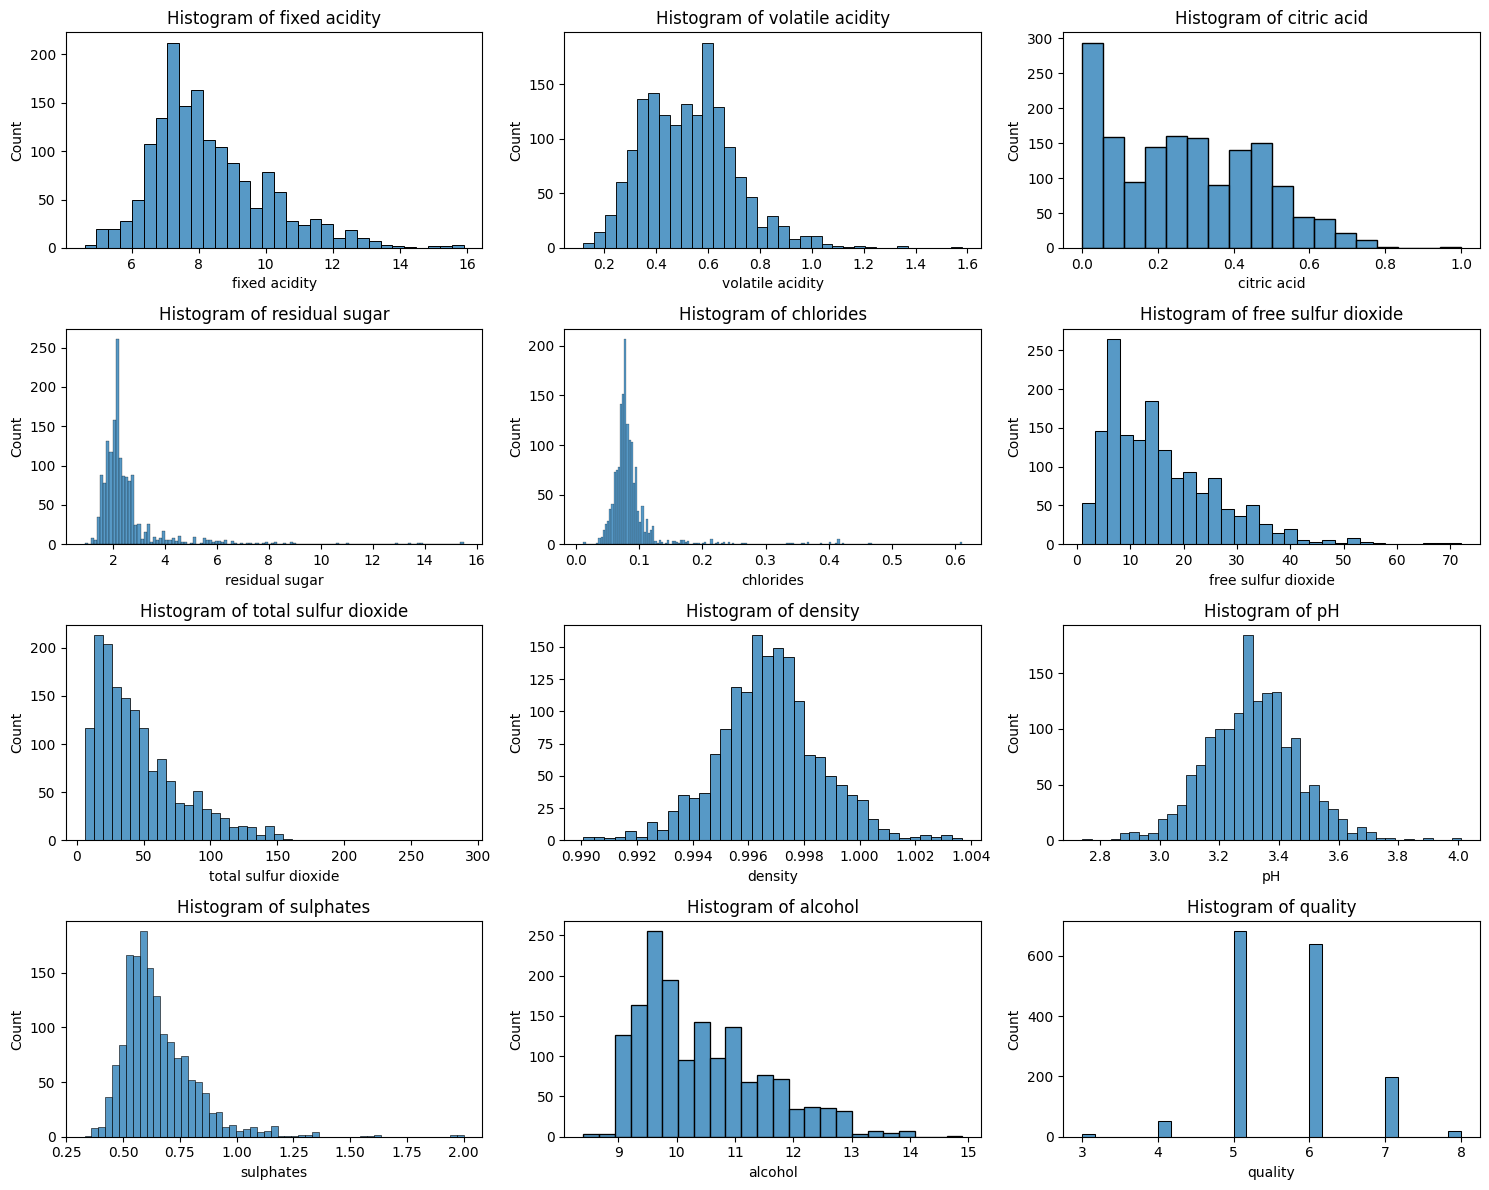

In [16]:
fig, axes = plt.subplots(4, 3, figsize=(15, 12))  
axes = axes.flatten()  

for i, col in enumerate(wine_red.columns):
    sns.histplot(data=wine_red, x=col, kde=False, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')

# Turn off any unused axes (if less than 12 features)
for j in range(len(wine_red.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


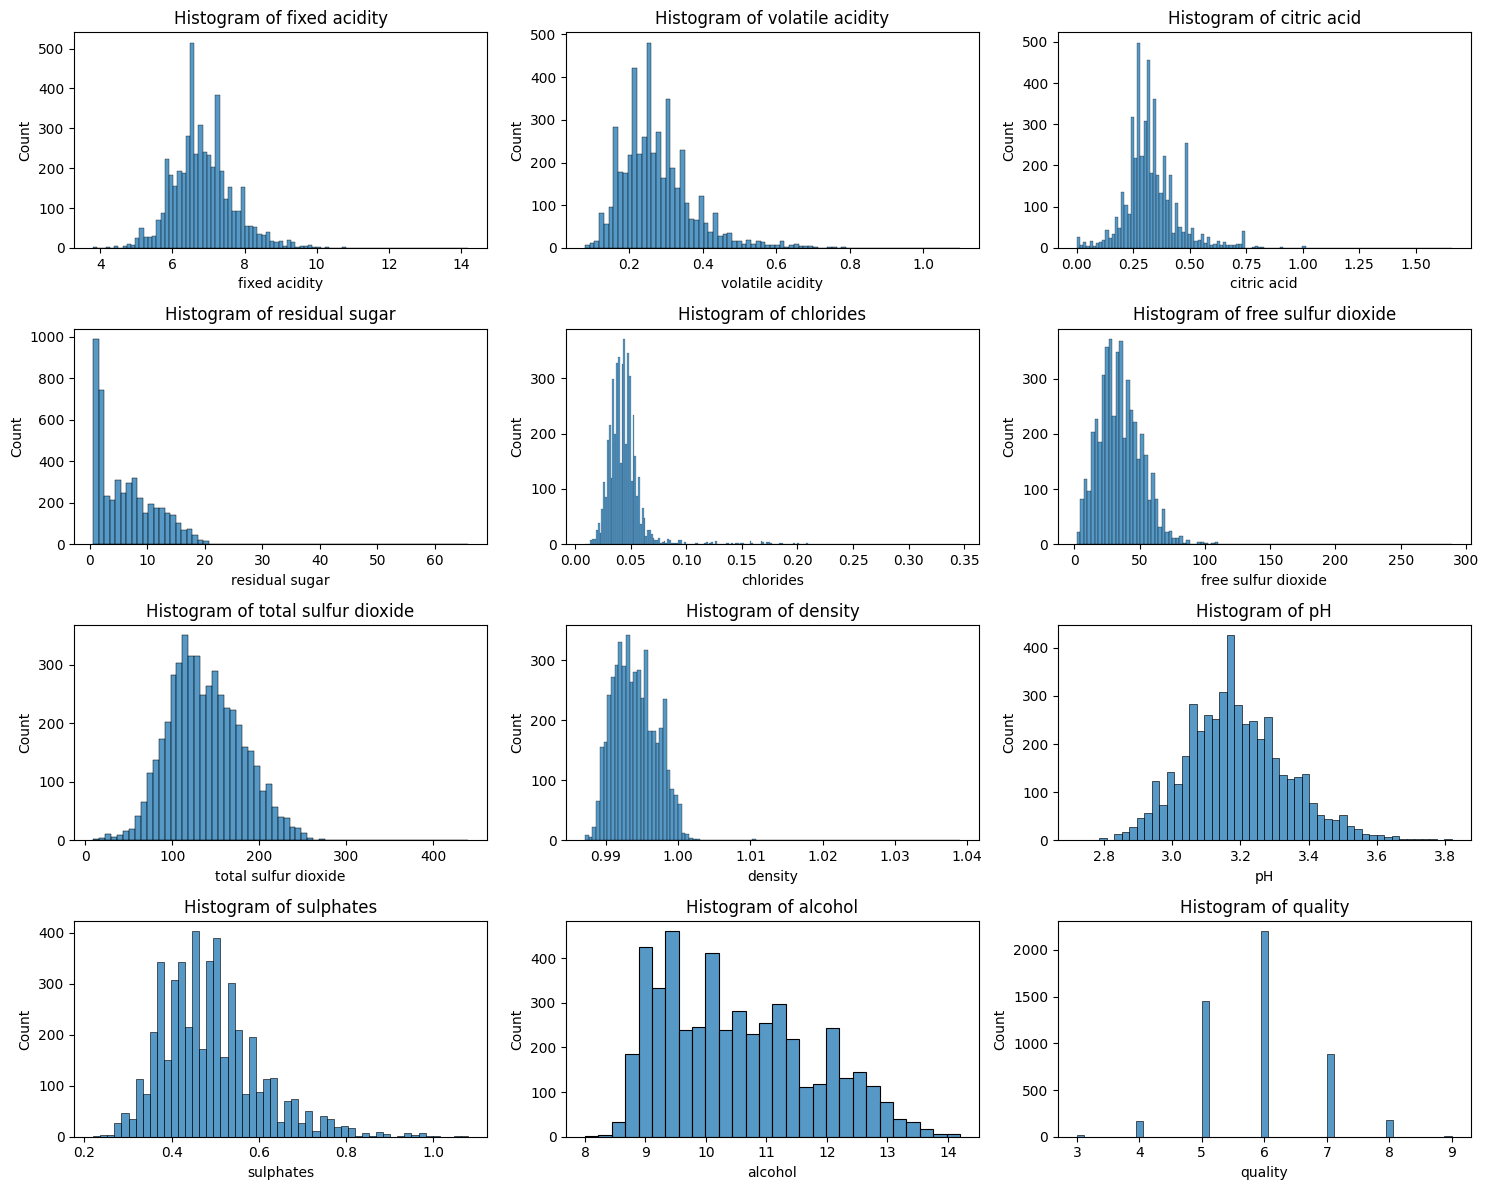

In [17]:
fig, axes = plt.subplots(4, 3, figsize=(15, 12))  
axes = axes.flatten()  

for i, col in enumerate(wine_white.columns):
    sns.histplot(data=wine_white, x=col, kde=False, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')

# Turn off any unused axes (if less than 12 features)
for j in range(len(wine_white.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


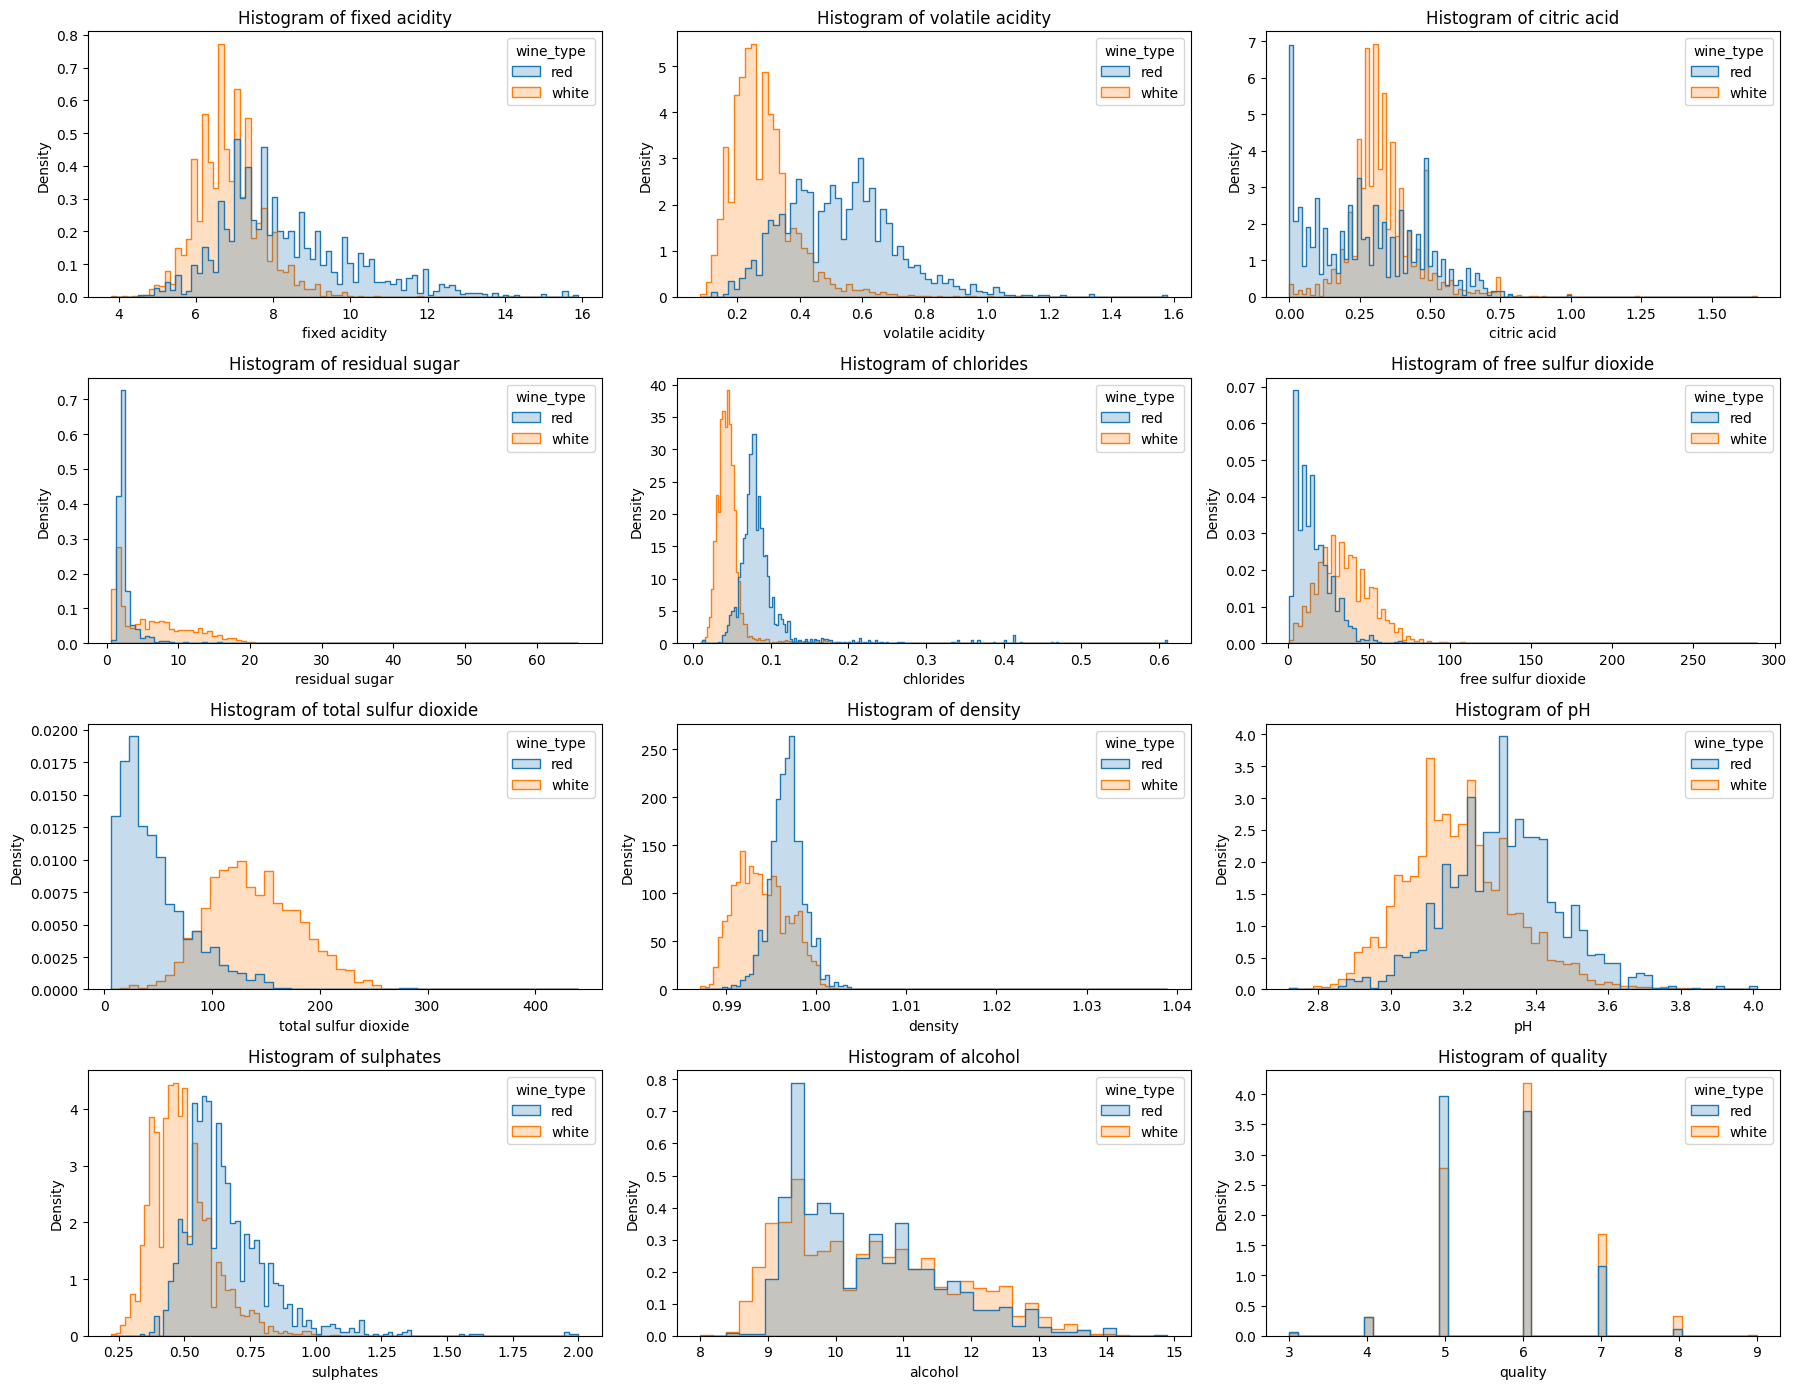

In [18]:
fig, axes = plt.subplots(4, 3, figsize=(18, 14))
axes = axes.flatten()
features = [col for col in wines.columns if col != 'wine_type']

# Plot histograms for each feature with hue for wine type
for i, col in enumerate(features):
    sns.histplot(data=wines, x=col, hue='wine_type', kde=False, ax=axes[i], 
                 element='step', stat='density', common_norm=False, legend=True)
    axes[i].set_title(f'Histogram of {col}')

# Hide unused axes if any
for j in range(len(features), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [19]:
# Separate features
features = [col for col in wines.columns if col != 'wine_type']


# Store results
results = []

for col in features:
    stat, p = mannwhitneyu(wine_red[col], wine_white[col], alternative='two-sided')
    results.append({
        'Feature': col,
        'U-statistic': stat,
        'p-value': p,
        'Significant': 'Yes' if p < 0.05 else 'No'
    })

# Convert to DataFrame
results_df = pd.DataFrame(results).sort_values('p-value')

print(results_df)


                 Feature  U-statistic        p-value Significant
1       volatile acidity    7059623.5   0.000000e+00         Yes
4              chlorides    7407015.5   0.000000e+00         Yes
5    free sulfur dioxide    1186396.5   0.000000e+00         Yes
6   total sulfur dioxide     366639.5   0.000000e+00         Yes
9              sulphates    6509961.0   0.000000e+00         Yes
0          fixed acidity    6138507.0  1.438930e-255         Yes
7                density    6059284.5  1.453091e-237         Yes
8                     pH    5681839.5  5.472258e-162         Yes
3         residual sugar    2569687.0   5.634073e-95         Yes
2            citric acid    3070088.5   1.312558e-38         Yes
11               quality    3311514.0   3.634341e-23         Yes
10               alcohol    3829043.5   1.818451e-01          No


In [20]:
def IQR(df, threshold = 3):
    Q1 = df[df.columns].quantile(0.25)
    Q3 = df[df.columns].quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df[df.columns] < (Q1 - threshold * IQR)) | (
        df[df.columns] > (Q3 + threshold * IQR)
    )
    print("Outlier Percentages per Column")
    print((outliers.sum()/len(df)) * 100)
    

In [21]:
IQR(wine_red)

Outlier Percentages per Column
fixed acidity           0.312695
volatile acidity        0.062539
citric acid             0.000000
residual sugar          5.503440
chlorides               4.190119
free sulfur dioxide     0.250156
total sulfur dioxide    0.125078
density                 0.000000
pH                      0.125078
sulphates               1.000625
alcohol                 0.000000
quality                 0.000000
dtype: float64


In [22]:
IQR(wine_white)

Outlier Percentages per Column
fixed acidity           0.081666
volatile acidity        0.796243
citric acid             0.449163
residual sugar          0.020416
chlorides               2.674561
free sulfur dioxide     0.163332
total sulfur dioxide    0.040833
density                 0.061249
pH                      0.000000
sulphates               0.224581
alcohol                 0.000000
quality                 0.000000
dtype: float64


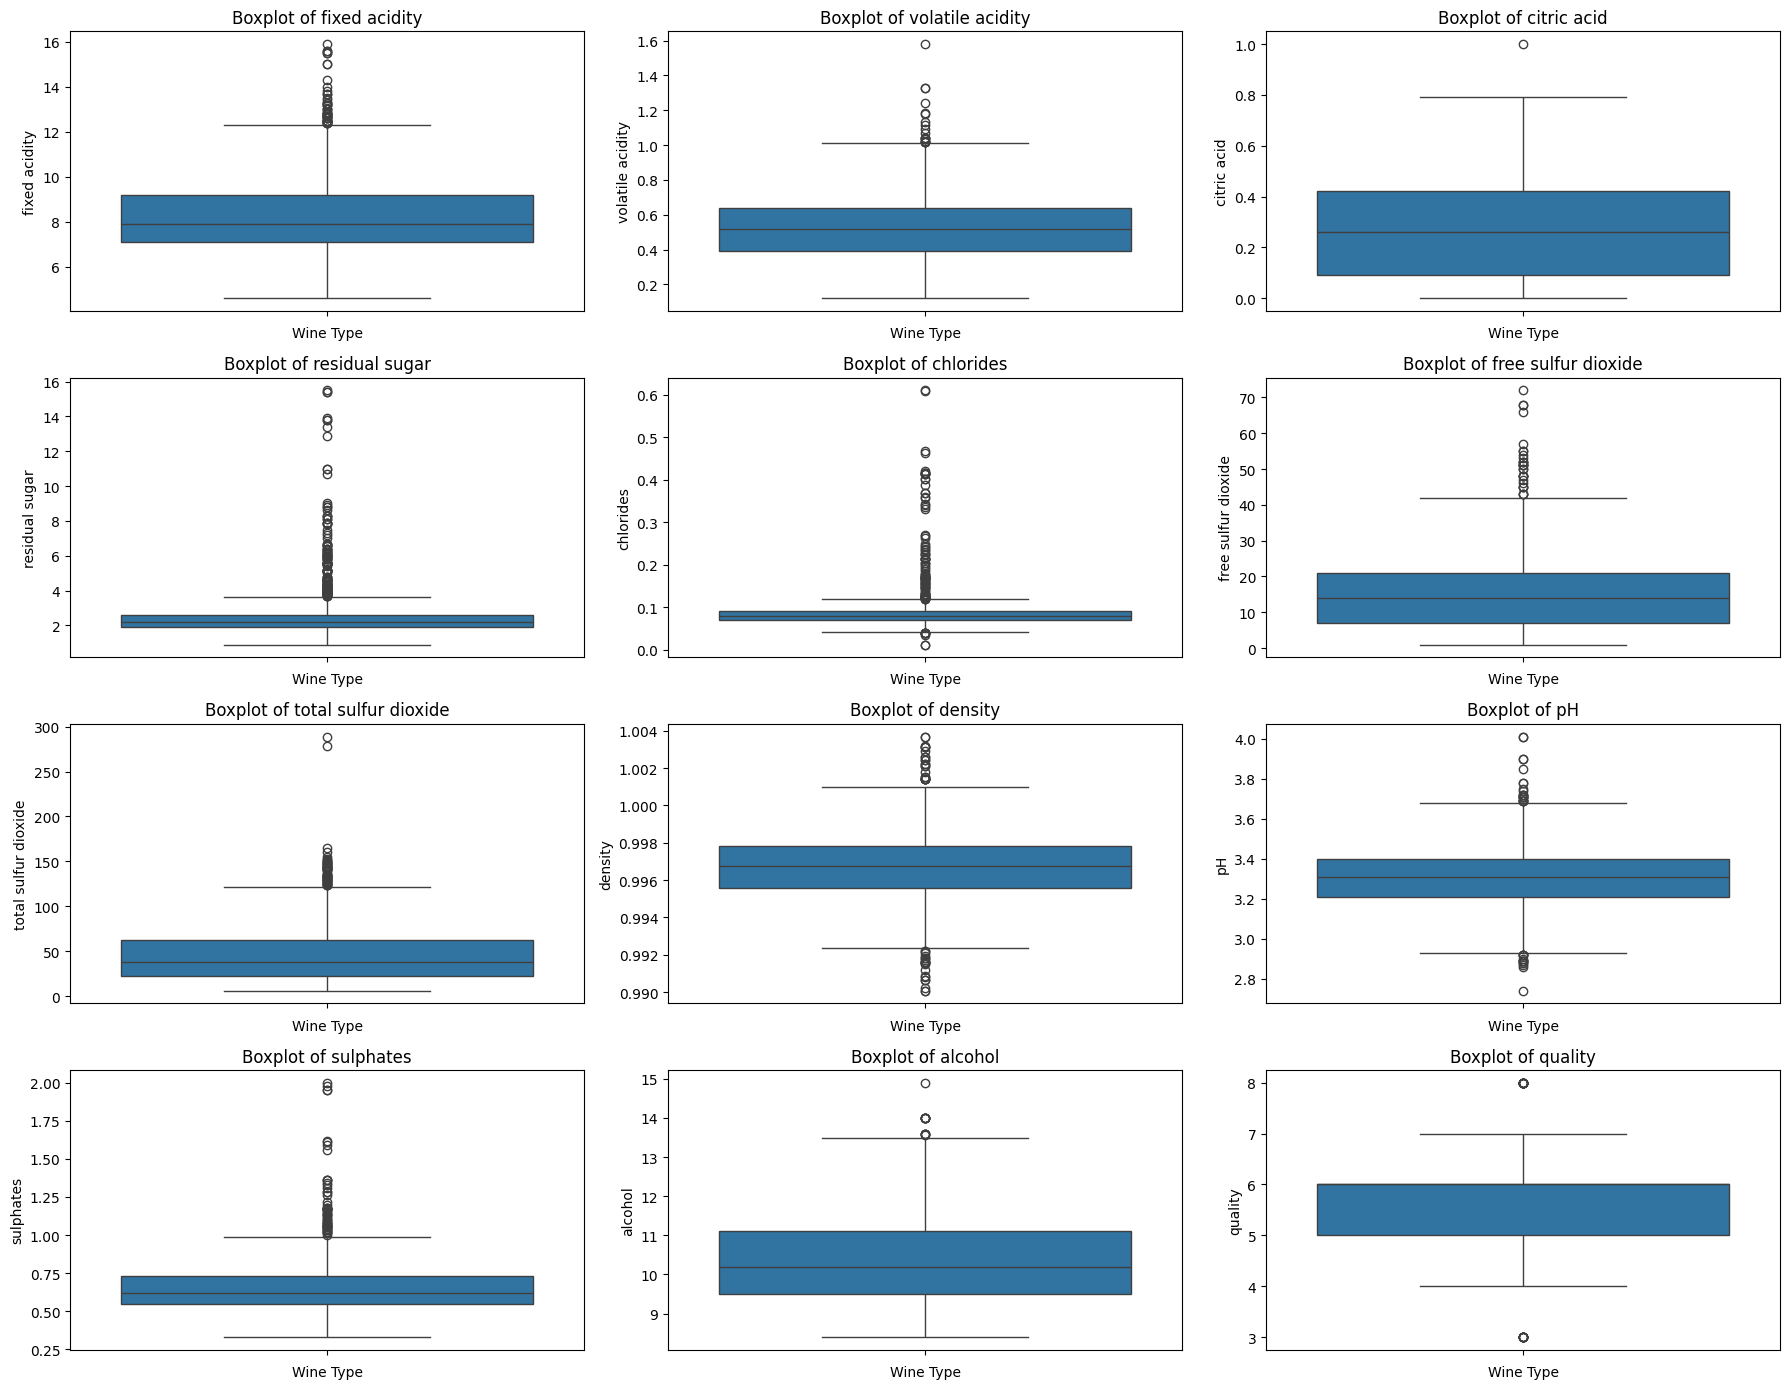

In [23]:
fig, axes = plt.subplots(4, 3, figsize=(18, 14))
axes = axes.flatten()

for i, col in enumerate(wine_red.columns):
    sns.boxplot(data=wine_red, y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('Wine Type')
    axes[i].set_ylabel(col)


plt.tight_layout()
plt.show()


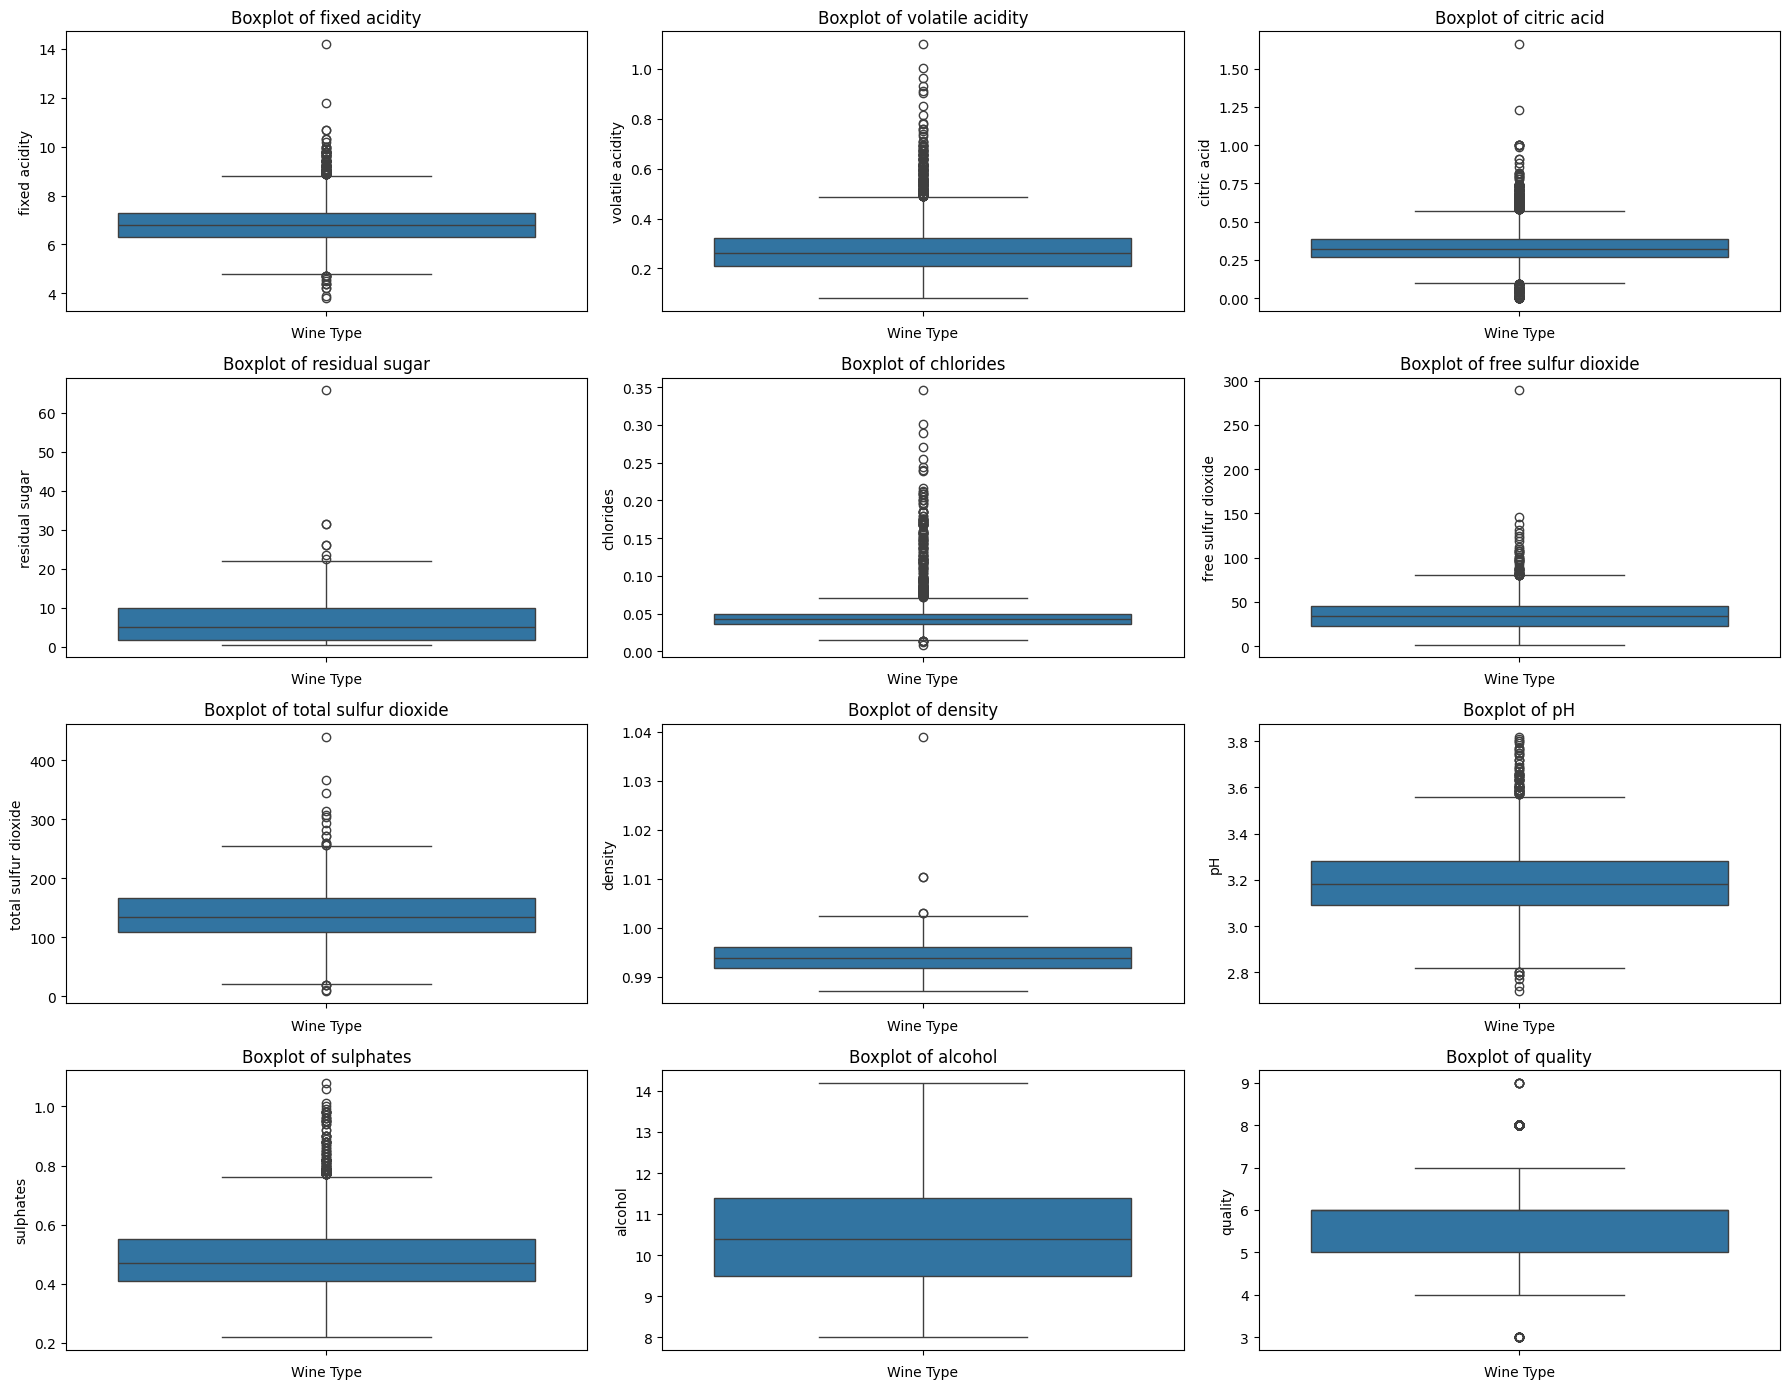

In [24]:
fig, axes = plt.subplots(4, 3, figsize=(18, 14))
axes = axes.flatten()

for i, col in enumerate(wine_white.columns):
    sns.boxplot(data=wine_white, y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('Wine Type')
    axes[i].set_ylabel(col)


plt.tight_layout()
plt.show()


<Figure size 2000x2000 with 0 Axes>

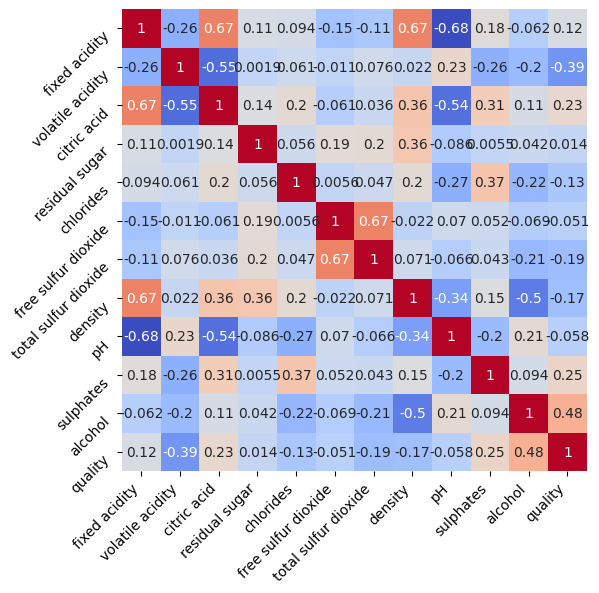

In [25]:
fig = plt.figure(figsize=(20, 20))

correlation = wine_red[wine_red.columns].corr()

plt.figure(figsize=(6, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", cbar=False)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45, va="top")

plt.show()

<Figure size 2000x2000 with 0 Axes>

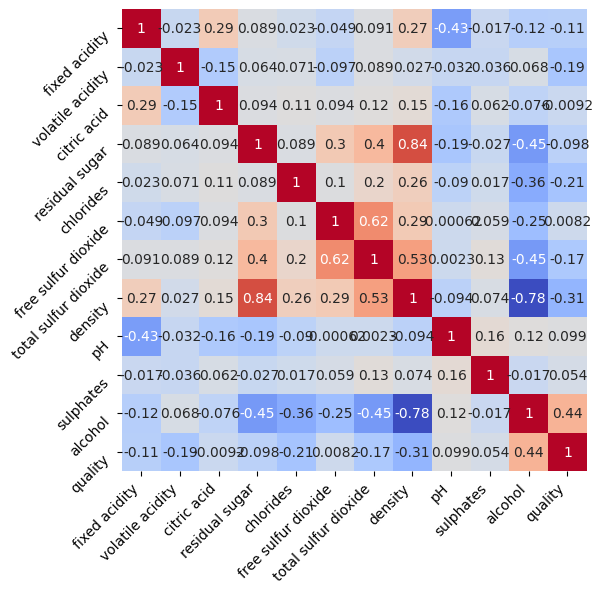

In [26]:
fig = plt.figure(figsize=(20, 20))

correlation = wine_white[wine_white.columns].corr()

plt.figure(figsize=(6, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", cbar=False)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45, va="top")

plt.show()

In [27]:
def wine_quality_categorization(quality):
    if quality >= 6:
        return "good"
    else:
        return "bad"

In [28]:
wine_red["quality"] = wine_red["quality"].apply(wine_quality_categorization)
wine_white["quality"] = wine_white["quality"].apply(wine_quality_categorization)
wines["quality"] = wines["quality"].apply(wine_quality_categorization)

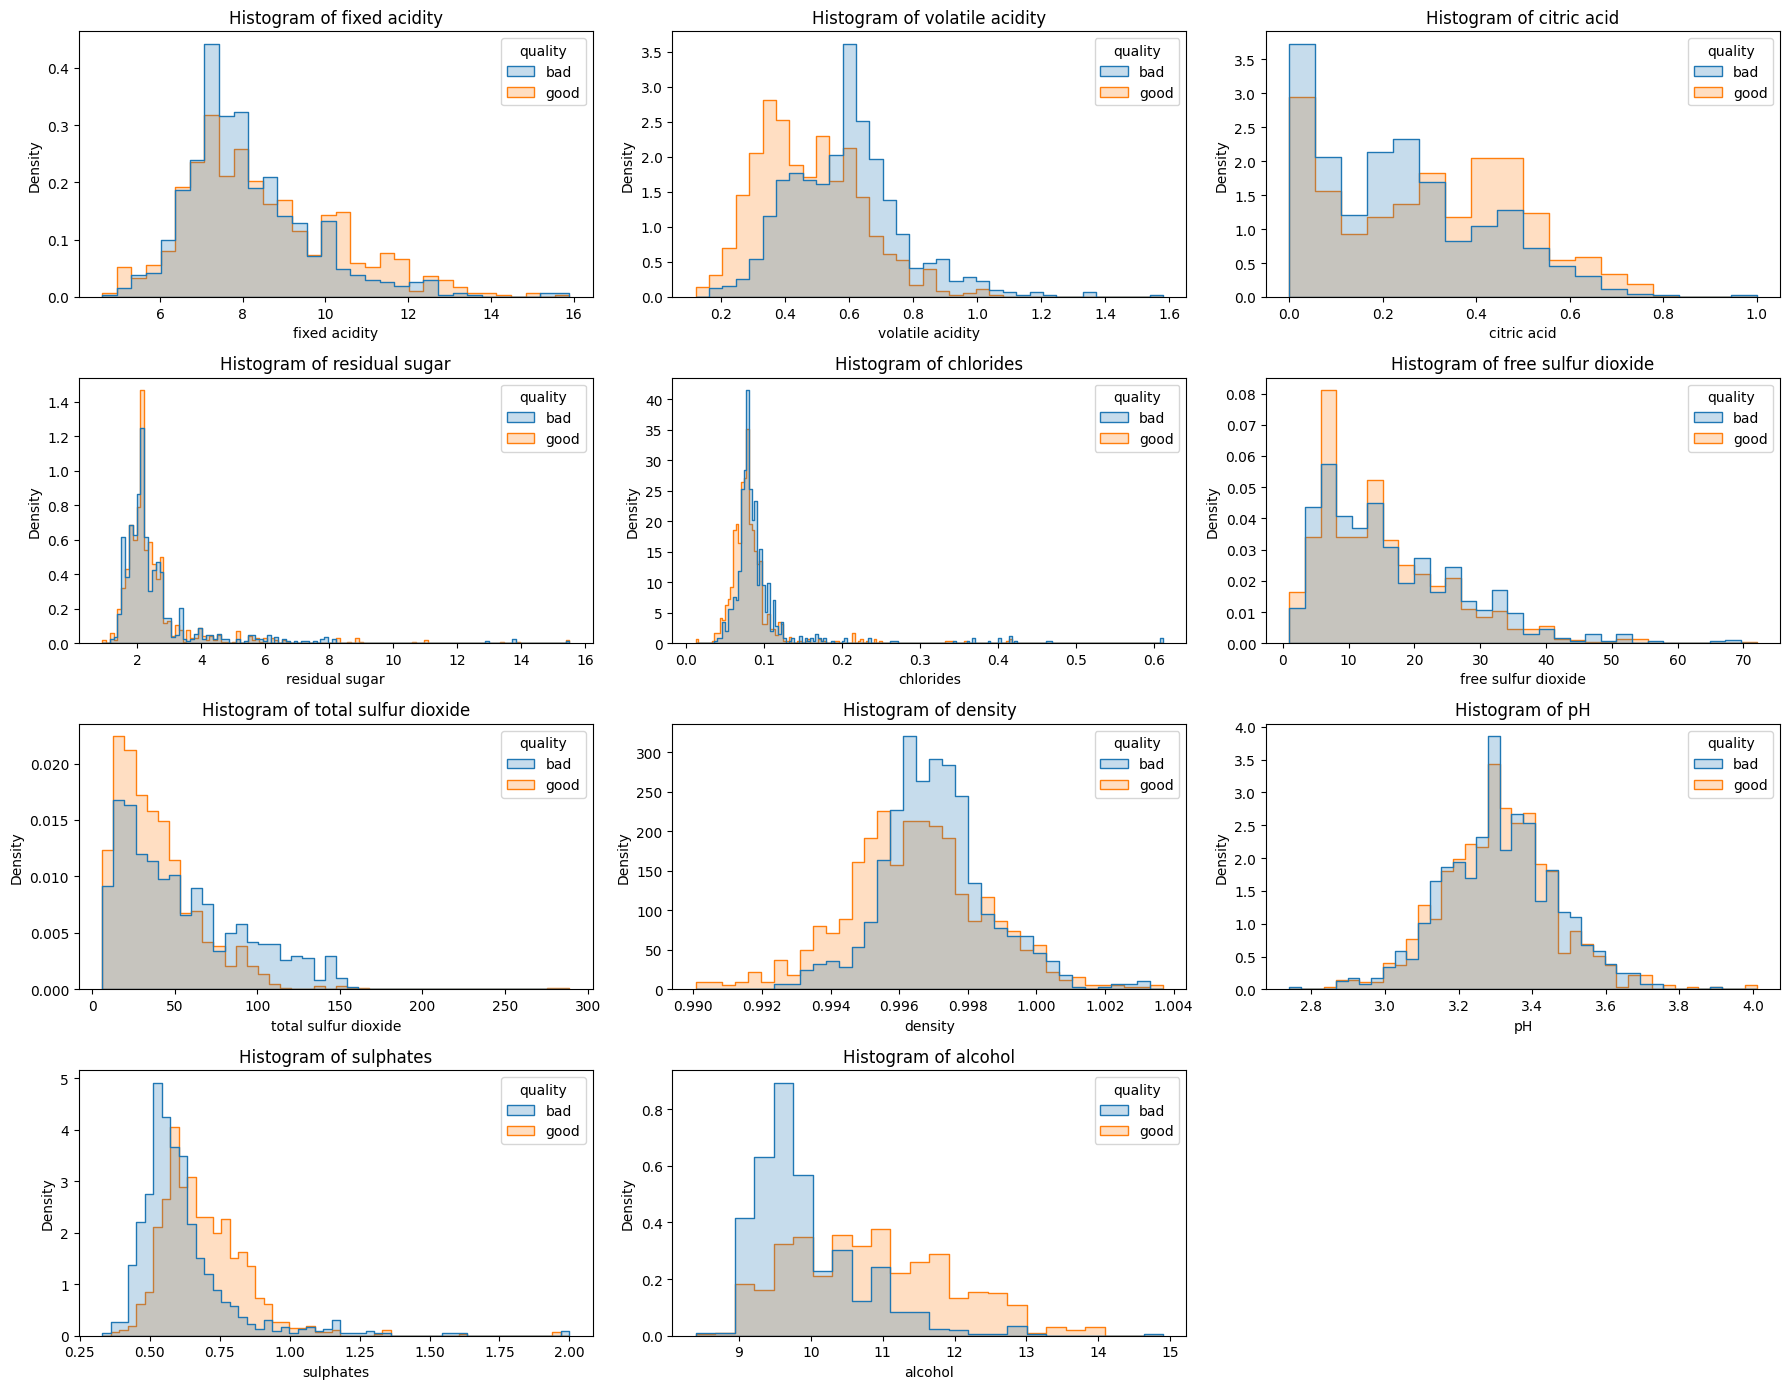

In [29]:
fig, axes = plt.subplots(4, 3, figsize=(18, 14))
axes = axes.flatten()
features = [col for col in wine_red.columns if col != 'quality']

for i, col in enumerate(features):
    sns.histplot(data=wine_red, x=col, hue='quality', kde=False, ax=axes[i], 
                 element='step', stat='density', common_norm=False, legend=True)
    axes[i].set_title(f'Histogram of {col}')

# Hide unused axes if any
for j in range(len(features), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [31]:
# Separate features
features = [col for col in wines.columns if col != 'quality' and col != 'wine_type']

wine_red_good_quality = wine_red[wine_red['quality'] == "good"]
wine_red_bad_quality = wine_red[wine_red['quality'] == "bad"]

# Store results
results = []

for col in features:
    stat, p = mannwhitneyu(wine_red_good_quality[col], wine_red_bad_quality[col], alternative='two-sided')
    results.append({
        'Feature': col,
        'U-statistic': stat,
        'p-value': p,
        'Significant': 'Yes' if p < 0.05 else 'No'
    })

# Convert to DataFrame
results_df = pd.DataFrame(results).sort_values('p-value')

print(results_df)


                 Feature  U-statistic       p-value Significant
10               alcohol     481313.0  2.006059e-70         Yes
9              sulphates     440968.0  1.177947e-40         Yes
1       volatile acidity     197208.0  2.388474e-39         Yes
6   total sulfur dioxide     245006.0  2.136143e-15         Yes
4              chlorides     254091.0  3.719107e-12         Yes
7                density     257552.0  5.019222e-11         Yes
2            citric acid     376272.5  2.554688e-10         Yes
0          fixed acidity     347895.5  1.193549e-03         Yes
5    free sulfur dioxide     298401.5  3.263965e-02         Yes
3         residual sugar     323150.5  5.797433e-01          No
8                     pH     316157.5  8.363422e-01          No


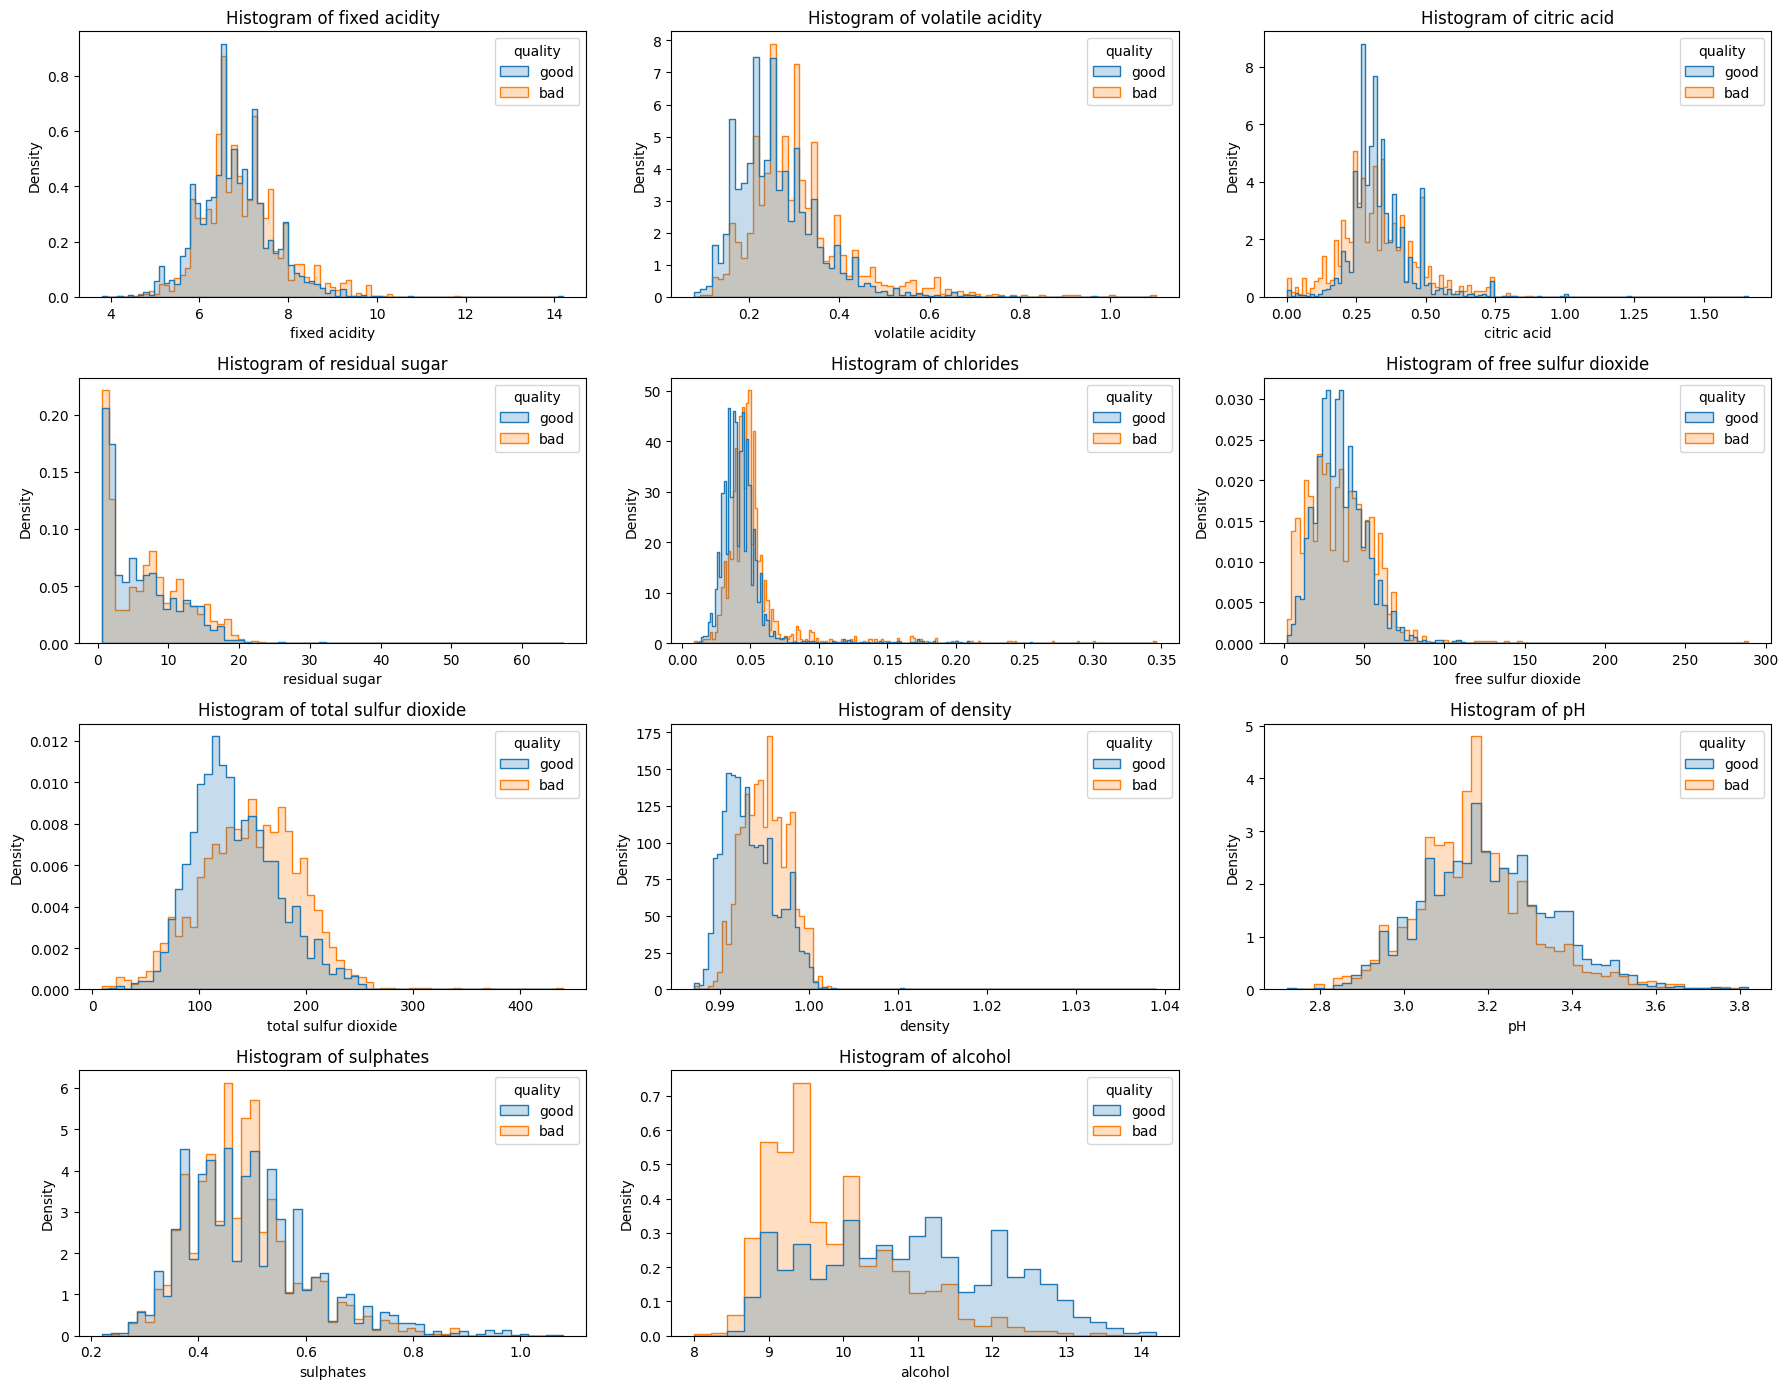

In [32]:
fig, axes = plt.subplots(4, 3, figsize=(18, 14))
axes = axes.flatten()
features = [col for col in wine_white.columns if col != 'quality']

for i, col in enumerate(features):
    sns.histplot(data=wine_white, x=col, hue='quality', kde=False, ax=axes[i], 
                 element='step', stat='density', common_norm=False, legend=True)
    axes[i].set_title(f'Histogram of {col}')

# Hide unused axes if any
for j in range(len(features), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [34]:
# Separate features
features = [col for col in wines.columns if col != 'quality' and col != 'wine_type']

wine_white_good_quality = wine_white[wine_white['quality'] == "good"]
wine_white_bad_quality = wine_white[wine_white['quality'] == "bad"]

# Store results
results = []

for col in features:
    stat, p = mannwhitneyu(wine_white_good_quality[col], wine_white_bad_quality[col], alternative='two-sided')
    results.append({
        'Feature': col,
        'U-statistic': stat,
        'p-value': p,
        'Significant': 'Yes' if p < 0.05 else 'No'
    })

# Convert to DataFrame
results_df = pd.DataFrame(results).sort_values('p-value')

print(results_df)


                 Feature  U-statistic        p-value Significant
10               alcohol    3926540.5  3.696843e-159         Yes
7                density    1720368.0   3.326107e-92         Yes
4              chlorides    1819301.0   1.876827e-74         Yes
1       volatile acidity    1921500.5   4.123077e-58         Yes
6   total sulfur dioxide    2086080.5   4.735901e-36         Yes
8                     pH    2966022.0   2.858839e-10         Yes
0          fixed acidity    2430583.0   2.419737e-07         Yes
3         residual sugar    2439309.5   6.578255e-07         Yes
9              sulphates    2781642.0   1.836787e-02         Yes
2            citric acid    2740210.5   1.413184e-01          No
5    free sulfur dioxide    2729002.5   2.186507e-01          No
